# Clusters espaciales 

> Fill in a module description here

In [ ]:
#| default_exp Cluster_espaciales

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| hide 
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random
import numpy as np
import shapely
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

In [ ]:
#| export
class data_points:
    """Una clase que contiene a los datos"""
    def __init__(self, n, min_x = 0, min_y = 0, max_x= 1, max_y=1, seed= None):
        if seed != None:
            random.seed(seed)

        Xpoint = np.random.uniform(low= min_x, high= max_x, size=n)
        Ypoint = np.random.uniform(low= min_y, high= max_y, size=n)
        
        #self.Points = np.random.uniform(low= min_x, high= max_x, size=(n, 2))
        self.Points =  [shapely.Point(x[0],x[1]) for x in zip(Xpoint, Ypoint)]
    
    @classmethod
    def from_list(cls, list_points):
        """Se genera los datos usando una lista de puntos"""
        toto = cls(0)
        toto.Points = list_points
        return toto
    
    def get_points(self):
        """Una funcion que para obtener los puntos"""
        return self.Points

    def get_Multypoint(self):
        """Regresa un objeto MultiPoint con los puntos"""
        return shapely.geometry.MultiPoint(self.Points)
    
    def get_X(self):
        """Regresa las coordenadas X"""
        return [x.x for x in self.Points]

    def get_Y(self):
        """Regresa las coordenadas X"""
        return [x.y for x in self.Points]
    
    def centroid(self):
        """Regresa el centroide de los puntos """
        return shapely.centroid(self.get_Multypoint())
    
    def as_array(self):
        """Regresa los puntos como un array"""
        list_arrays = np.array([ (geom.xy[0][0], geom.xy[1][0]) for geom in self.Points])
        return list_arrays

    def add_points(self, data_points):
        """Agrega puntos de otra """
        self.Points = self.Points + data_points.Points
        return 
    
    
     


In [ ]:
#| hide
datos_simples = data_points(40)

In [ ]:
#| hide 
datos_simples

<__main__.data_points>

In [ ]:
#| hide 
datos_simples = data_points(40)


In [ ]:
#| hide
datos_simples.get_points()

[<POINT (0.255 0.197)>,
 <POINT (0.493 0.00345)>,
 <POINT (0.292 0.865)>,
 <POINT (0.184 0.827)>,
 <POINT (0.391 0.869)>,
 <POINT (0.0872 0.0971)>,
 <POINT (0.687 0.141)>,
 <POINT (0.212 0.702)>,
 <POINT (0.899 0.499)>,
 <POINT (0.707 0.778)>,
 <POINT (0.867 0.153)>,
 <POINT (0.469 0.513)>,
 <POINT (0.578 0.843)>,
 <POINT (0.1 0.333)>,
 <POINT (0.0301 0.0753)>,
 <POINT (0.321 0.0699)>,
 <POINT (0.377 0.841)>,
 <POINT (0.722 0.665)>,
 <POINT (0.0135 0.733)>,
 <POINT (0.648 0.214)>,
 <POINT (0.962 0.599)>,
 <POINT (0.608 0.514)>,
 <POINT (0.945 0.285)>,
 <POINT (0.253 0.145)>,
 <POINT (0.779 0.501)>,
 <POINT (0.759 0.84)>,
 <POINT (0.242 0.411)>,
 <POINT (0.0614 0.292)>,
 <POINT (0.86 0.369)>,
 <POINT (0.696 0.691)>,
 <POINT (0.319 0.364)>,
 <POINT (0.957 0.478)>,
 <POINT (0.438 0.713)>,
 <POINT (0.389 0.333)>,
 <POINT (0.404 0.0979)>,
 <POINT (0.591 0.347)>,
 <POINT (0.0831 0.312)>,
 <POINT (0.136 0.984)>,
 <POINT (0.0856 0.768)>,
 <POINT (0.0059 0.403)>]

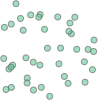

In [ ]:
#| hide
datos_simples.get_Multypoint()

In [ ]:
#| hide 
datos_simples.get_X()

[0.2547545281485736,
 0.49297270345574307,
 0.29156167484513384,
 0.18392260637383295,
 0.3911825339425197,
 0.0871928723970622,
 0.687416653239427,
 0.2122443350985127,
 0.8987555435003769,
 0.7073419450769509,
 0.8668815286189502,
 0.46904855501718246,
 0.5778109066859061,
 0.10044264544028192,
 0.030133239822163316,
 0.3213693334042741,
 0.3771462271279775,
 0.7223098521519031,
 0.013479249281464933,
 0.6483548802228514,
 0.9616686871122704,
 0.6075402636970145,
 0.9453980667686649,
 0.25344257457097297,
 0.7790313018353086,
 0.7587013828606447,
 0.2415682873645678,
 0.06143313088291413,
 0.8595105986110959,
 0.6957011953464575,
 0.31856619471934344,
 0.9573560133200822,
 0.43790821051046946,
 0.38921118111377495,
 0.4037059893172932,
 0.5905759425127446,
 0.08307745211960893,
 0.13598634929412967,
 0.08555444854778793,
 0.005895259381072049]

In [ ]:
#| hide 
len(datos_simples.get_X())

40

In [ ]:
#| hide
if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
    raise Exception("Si hay problema la evaluacion ")

Es para mostrar como funciona 

In [ ]:
datos_simples = data_points(500, min_x = .75, min_y= .75, max_x= 1, max_y= 1 )

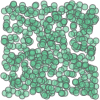

In [ ]:
datos_simples.get_Multypoint()

In [ ]:
show_doc(data_points.get_Multypoint)

---

### data_points.get_Multypoint

>      data_points.get_Multypoint ()

*Regresa un objeto MultiPoint con los puntos*

In [ ]:


#| export

class Clusters:
    """Clase para generar los clusters a partir de un objeto de la clase data_points
    
    Esta clase se utiliza para generar los distintos tipos de clusterizaciones, 
    se almacena los datos en una estructura de datos y se le añaden las respectivas 
    classes
    """
    
    def __init__(self, data_points_i, seed=1234):
        
        if seed != None:
            random.seed(seed)
        
        self.data_structure =  data_points_i
    
    def KMeans(self, **kwargs):
        """
        Se usa el algoritmo Kmeans para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_Kmeans.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        kmeans_c = KMeans(**kwargs)
        classes_val = kmeans_c.fit_predict(self.data_structure.as_array())
        self.data_structure.classes_Kmeans = classes_val
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  kmeans_c
        

    def DBSCAN(self, **kwargs):
        """
        Se DBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_DBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro."""
        
        db = DBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_DBSCAN = db.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  db
    
    
    def HDBSCAN(self, **kwargs):
        """
        Se HDBSCAN para la obtencion de clusters, las clases quedan almacenadas
        en .data_structure_classes_HDBSCAN. Si se desea obtener el modelo se tiene
        que añadir (ret_model = True) como parámetro.
        """
        hdb = HDBSCAN(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_HDBSCAN = hdb.labels_
        if 'ret_model' in kwargs and kwargs['ret_model']==True : 
            return  hdb
        

    def OPTICS(self, **kwargs):
        """
        Se usa el algoritmo OPTICS para la obtencion de clusters, 
        las clases quedan almacenadas en .data_structure_classes_OPTICS.
        Si se desea obtener el modelo se tiene que añadir 
        (ret_model = True) como parámetro.
        """
        optics=  OPTICS(**kwargs).fit(self.data_structure.as_array())
        self.data_structure.classes_OPTICS = optics.labels_
        
        if 'ret_model' in kwargs and kwargs['ret_model']==True :
            return  optics
        

     


In [ ]:
#| hide 
cluster_all  = Clusters(datos_simples)
cluster_all.KMeans()

In [ ]:
#| hide
cluster_all.data_structure.classes_Kmeans

array([3, 1, 3, 5, 2, 1, 0, 5, 0, 6, 7, 7, 0, 4, 3, 7, 3, 1, 6, 6, 6, 1,
       6, 2, 0, 7, 3, 6, 4, 4, 2, 5, 6, 4, 5, 5, 2, 2, 4, 5, 0, 2, 2, 1,
       4, 2, 5, 3, 0, 1, 3, 3, 5, 7, 7, 5, 5, 2, 4, 0, 6, 2, 6, 7, 4, 2,
       5, 7, 7, 3, 1, 4, 1, 5, 1, 3, 0, 7, 5, 0, 3, 4, 2, 3, 7, 2, 7, 4,
       6, 6, 2, 6, 4, 4, 1, 4, 0, 4, 0, 6, 0, 6, 2, 2, 1, 7, 6, 7, 2, 2,
       4, 7, 2, 6, 3, 7, 6, 3, 0, 7, 3, 2, 7, 0, 5, 3, 5, 7, 1, 3, 5, 2,
       2, 5, 6, 4, 3, 4, 6, 5, 7, 6, 5, 6, 5, 4, 4, 1, 0, 7, 5, 1, 7, 5,
       7, 2, 4, 2, 6, 6, 4, 3, 3, 5, 1, 6, 4, 7, 1, 0, 6, 5, 6, 7, 7, 5,
       2, 1, 2, 5, 1, 5, 0, 4, 0, 4, 7, 0, 0, 0, 1, 1, 1, 6, 2, 6, 2, 0,
       2, 0, 2, 6, 3, 0, 4, 4, 2, 0, 5, 5, 2, 7, 5, 4, 7, 3, 5, 4, 1, 0,
       1, 0, 5, 0, 1, 7, 4, 4, 1, 2, 7, 7, 3, 5, 7, 4, 7, 2, 4, 7, 5, 2,
       1, 3, 2, 6, 1, 5, 7, 2, 7, 6, 3, 7, 1, 2, 0, 7, 3, 5, 4, 0, 4, 7,
       2, 3, 1, 6, 1, 0, 1, 2, 4, 1, 7, 6, 2, 6, 0, 7, 3, 4, 4, 4, 4, 0,
       3, 2, 0, 6, 1, 2, 1, 3, 4, 4, 5, 6, 5, 2, 5,

In [ ]:
#| hide 
cluster_all.DBSCAN(eps=0.01, min_samples=10)


In [ ]:
#| hide
cluster_all.HDBSCAN()

In [ ]:
#| hide
cluster_all.OPTICS()

In [ ]:
datos_simples_3 = data_points(500, min_x = 0.6, min_y= 0.6, max_x= 1.0,
max_y= 1.0 )
datos_simples_2 = data_points(500, min_x = 0.0, min_y= 0.6, max_x= 0.4,
max_y= 1.0 )
datos_simples_1 = data_points(500, min_x = 0.6, min_y= 0.0, max_x= 1.0,
max_y= 0.4 )
datos_simples_0 = data_points(500, min_x = 0.0, min_y= 0.0, max_x= 0.4,
max_y= 0.4 )

In [ ]:
datos_simples_0.add_points(datos_simples_1)
datos_simples_0.add_points(datos_simples_2)
datos_simples_0.add_points(datos_simples_3)

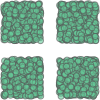

In [ ]:
datos_simples_0.get_Multypoint()

In [ ]:
cluster_all = Clusters(datos_simples_0)

In [ ]:
cluster_all.OPTICS()
cluster_all.HDBSCAN()
cluster_all.DBSCAN(eps=0.1, min_samples=10)
cluster_all.KMeans()

<matplotlib.collections.PathCollection>

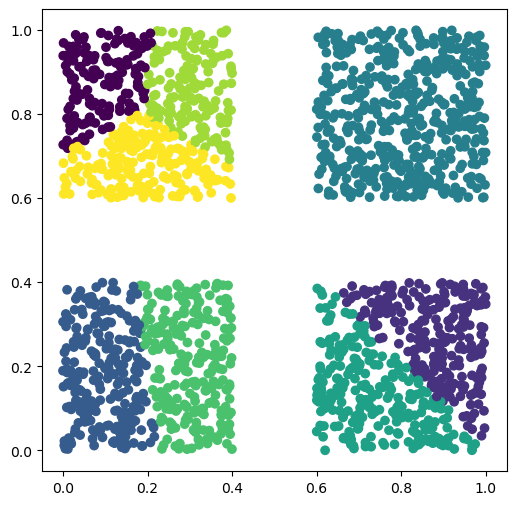

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(cluster_all.data_structure.get_X(), 
            cluster_all.data_structure.get_Y(),
           c = cluster_all.data_structure.classes_Kmeans
)

<matplotlib.collections.PathCollection>

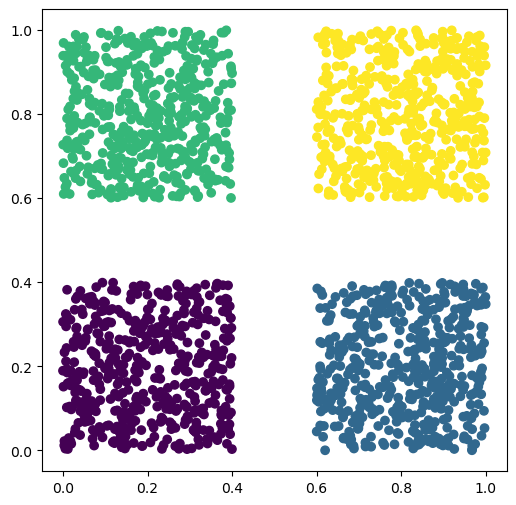

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
cluster_all.data_structure.get_X(),
cluster_all.data_structure.get_Y(),
c = cluster_all.data_structure.classes_DBSCAN
)

<matplotlib.collections.PathCollection>

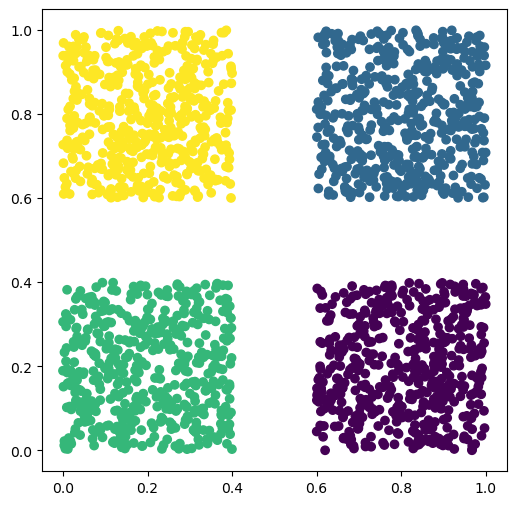

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
cluster_all.data_structure.get_X(),
cluster_all.data_structure.get_Y(),
c = cluster_all.data_structure.classes_HDBSCAN
)

<matplotlib.collections.PathCollection>

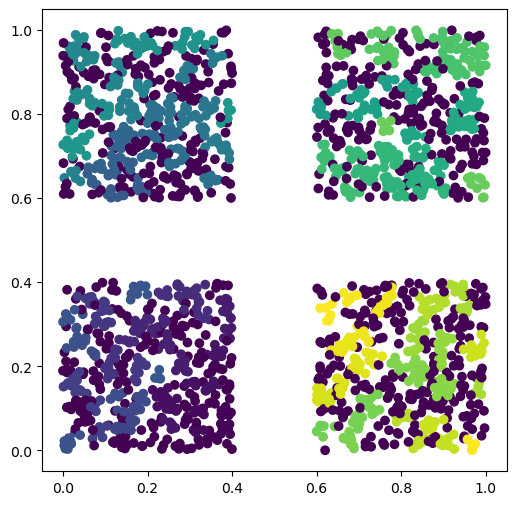

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
plt.scatter(
cluster_all.data_structure.get_X(),
cluster_all.data_structure.get_Y(),
c = cluster_all.data_structure.classes_OPTICS)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()